In [211]:
import librosa
import librosa.display
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display, clear_output
import time

Kokeiltavia preprosessointeja
- melSpec_dB (window = 64ms, hop = 1/4 window, power = 4,  n_mels = 32)
- melSpec_dB kohinanpoistolla
- Mel-frequency cepstrum

In [270]:
ff1010bird_labels = np.loadtxt('./data/ff1010bird_metadata_2018.csv', dtype=str, delimiter=',', skiprows=1)
audio, rate = librosa.load('./data/ff1010bird_wav/wav/' + str(ff1010bird_labels[87][0]) + '.wav')
Audio(audio, rate=rate)

In [219]:
melSpec_dB.shape

(32, 627)

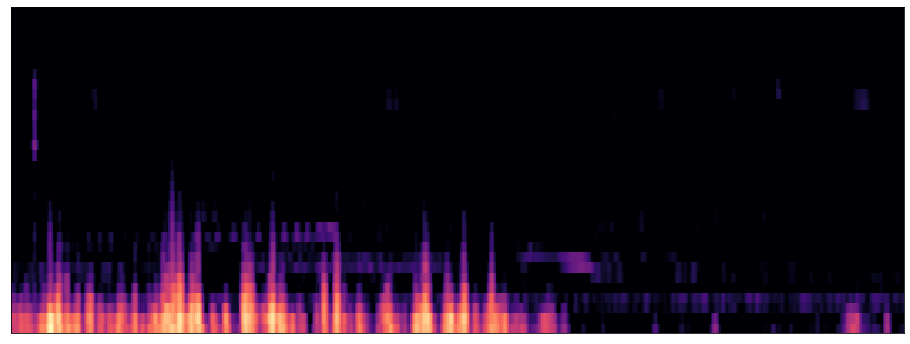

In [271]:
windowms = 64
hop_size = 1/4
hop = int(np.round(rate * windowms / (2000) * hop_size)*2)
melspectogram = librosa.feature.melspectrogram(audio, sr= rate, n_fft= hop * 8, hop_length= hop, power = 4, n_mels=32)
melSpec_dB = librosa.power_to_db(melspectogram, ref=np.max)
plt.figure(figsize=(16, 6))
librosa.display.specshow(melSpec_dB)

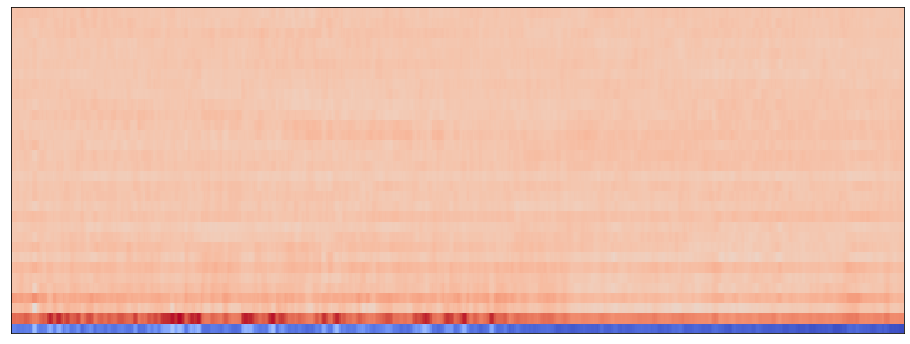

In [272]:
cepstogram = librosa.feature.mfcc(audio, sr = rate,n_mfcc = 32, hop_length= hop)
plt.figure(figsize=(16, 6))
librosa.display.specshow(cepstogram)

In [273]:
cepstogram.shape

(32, 627)

<ipython-input-248-48d3add09869>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta, residual, _, _ = np.linalg.lstsq(H, z)


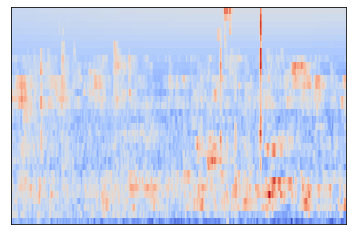

In [248]:
X, Y = np.meshgrid(range(melSpec_dB.shape[1]), range(melSpec_dB.shape[0]))
Z = melSpec_dB

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

H = np.column_stack([
    x**2,
    y**2,
    x * y,
    x,
    y,
    np.ones_like(x)
])
theta, residual, _, _ = np.linalg.lstsq(H, z)
# Predict
z_pred = H @ theta
Z_pred = np.reshape(z_pred, X.shape)

# Subtract & show
S = Z - Z_pred
librosa.display.specshow(S)


In [284]:
np.array(ff1010bird_joint).shape

(20, 32, 627, 2)

In [292]:
ff1010bird_labels = np.loadtxt('./data/ff1010bird_metadata_2018.csv', dtype=str, delimiter=',', skiprows=1)
windowms = 64
hop_size = 1/4
freq_bins = 32
ff1010bird_specs = []
ff1010bird_mfcc = []
ff1010bird_joint = []
i = 1
start = time.time()
for filename, _, label in ff1010bird_labels[:20,:]:
    
    audio, rate = librosa.load('./data/ff1010bird_wav/wav/' + filename + '.wav')
    hop = int(np.round(rate * windowms / (2000) * hop_size)*2)  
    
    melspectogram = librosa.feature.melspectrogram(audio, sr= rate, n_fft= hop * 8, hop_length= hop, power = 4, n_mels=freq_bins)
    melSpec_dB = librosa.power_to_db(melspectogram, ref=np.max)
    
    cepstogram = librosa.feature.mfcc(audio, sr = rate, n_mfcc = freq_bins, hop_length= hop)
    
    ff1010bird_specs.append(melSpec_dB)
    ff1010bird_mfcc.append(cepstogram)
    ff1010bird_joint.append(np.array([melSpec_dB, cepstogram]).reshape([freq_bins, melSpec_dB.shape[1], 2]))
    clear_output()
    display(f'Sound {i} preprocessed')
    i = i + 1
np.save('./data/preprocessed/ff1010bird_specs', np.array(ff1010bird_specs), allow_pickle=True)
np.save('./data/preprocessed/ff1010bird_mfcc', np.array(ff1010bird_mfcc), allow_pickle=True)
np.save('./data/preprocessed/ff1010bird_joint', np.array(ff1010bird_joint), allow_pickle=True)
np.save('./data/preprocessed/ff1010bird_labels', ff1010bird_labels[:,2])
display(f'Execution time {time.time() - start} seconds')

'Sound 20 preprocessed'

'Execution time 5.939000129699707 seconds'

In [298]:
np.array(ff1010bird_specs)


NameError: name 'dataset_name' is not defined

In [300]:
import librosa
import librosa.display
import os
import numpy as np
import matplotlib.pyplot as plt
import time

dataset_name = 'warblrb10k_public'
path = './data/warblrb10k_public_wav/wav/'
labels = warblrb10k_public_labels

#ff1010bird_wav dataset

windowms = 64
hop_size = 1/4
freq_bins = 32
ff1010bird_specs = []
ff1010bird_mfcc = []
ff1010bird_joint = []
i = 1
start = time.time()
for filename, _, label in labels[:20,:]:

    audio, rate = librosa.load(path + filename + '.wav')
    hop = int(np.round(rate * windowms / (2000) * hop_size)*2)  

    melspectogram = librosa.feature.melspectrogram(audio, sr= rate, n_fft= hop * 8, hop_length= hop, power = 4, n_mels=freq_bins)
    melSpec_dB = librosa.power_to_db(melspectogram, ref=np.max)

    cepstogram = librosa.feature.mfcc(audio, sr = rate, n_mfcc = freq_bins, hop_length= hop)

    ff1010bird_specs.append(melSpec_dB)
    ff1010bird_mfcc.append(cepstogram)
    ff1010bird_joint.append(np.array([melSpec_dB, cepstogram]).reshape([freq_bins, melSpec_dB.shape[1], 2]))
    print(f'Sound {i} preprocessed')
    i = i + 1

print(f'Execution time {time.time() - start} seconds')
print(f'{dataset_name} saved to ./data/preprocessed/')




Sound 1 preprocessed
Sound 2 preprocessed
Sound 3 preprocessed
Sound 4 preprocessed
Sound 5 preprocessed
Sound 6 preprocessed
Sound 7 preprocessed
Sound 8 preprocessed
Sound 9 preprocessed
Sound 10 preprocessed
Sound 11 preprocessed
Sound 12 preprocessed
Sound 13 preprocessed
Sound 14 preprocessed
Sound 15 preprocessed
Sound 16 preprocessed
Sound 17 preprocessed
Sound 18 preprocessed
Sound 19 preprocessed
Sound 20 preprocessed
Execution time 5.871999263763428 seconds
warblrb10k_public saved to ./data/preprocessed/


In [ ]:
np.save('./data/preprocessed/' + dataset_name + '_specs', np.array(ff1010bird_specs), allow_pickle=True)
np.save('./data/preprocessed/' + dataset_name + '_mfcc', np.array(ff1010bird_mfcc), allow_pickle=True)
np.save('./data/preprocessed/' + dataset_name + '_joint', np.array(ff1010bird_joint), allow_pickle=True)
np.save('./data/preprocessed/' + dataset_name + '_labels', ff1010bird_labels[:,2])

In [312]:
for array in ff1010bird_specs:
    print(array.shape)

(32, 632)
(32, 630)
(32, 630)
(32, 630)
(32, 630)
(32, 629)
(32, 643)
(32, 631)
(32, 630)
(32, 641)
(32, 632)
(32, 630)
(32, 643)
(32, 629)
(32, 627)
(32, 629)
(32, 632)
(32, 631)
(32, 629)
(32, 632)


In [323]:
import librosa
import librosa.display
import os
import numpy as np
import matplotlib.pyplot as plt
import time

def make_uniform(array, lenght):
    if array.shape[1] < lenght:
        missing = lenght - array.shape[1]
        new_array = np.pad(array, ((0, 0), (0, missing)), 'constant', constant_values=(0,0))
    elif array.shape[1] > lenght:
        new_array = array[lenght,:]
    elif array.shape[1] == lenght:
        new_array = array
    return new_array
            
            

#ff1010bird_wav dataset
def preprocess_dateset(dataset_name, path, labels, pad_to = 650):
    windowms = 64
    hop_size = 1/4
    freq_bins = 32
    ff1010bird_specs = []
    ff1010bird_mfcc = []
    ff1010bird_joint = []
    i = 1
    start = time.time()
    for filename, _, label in labels[:20,:]:
        
        audio, rate = librosa.load(path + filename + '.wav')
        hop = int(np.round(rate * windowms / (2000) * hop_size)*2)  
        
        melspectogram = librosa.feature.melspectrogram(audio, sr= rate, n_fft= hop * 8, hop_length= hop, power = 4, n_mels=freq_bins)
        melSpec_dB = librosa.power_to_db(melspectogram, ref=np.max)
        melSpec_dB = make_uniform(melSpec_dB, lenght=pad_to)
        
        cepstogram = librosa.feature.mfcc(audio, sr = rate, n_mfcc = freq_bins, hop_length= hop)
        cepstogram = make_uniform(cepstogram, lenght=pad_to)
        
        
        ff1010bird_specs.append(melSpec_dB)
        ff1010bird_mfcc.append(cepstogram)
        ff1010bird_joint.append(np.array([melSpec_dB, cepstogram]).reshape([freq_bins, pad_to, 2]))
        print(f'Sound {i} preprocessed')
        i = i + 1
        
    
    
    np.save('./data/preprocessed/' + dataset_name + '_specs', np.array(ff1010bird_specs), allow_pickle=True)
    np.save('./data/preprocessed/' + dataset_name + '_mfcc', np.array(ff1010bird_mfcc), allow_pickle=True)
    np.save('./data/preprocessed/' + dataset_name + '_joint', np.array(ff1010bird_joint), allow_pickle=True)
    np.save('./data/preprocessed/' + dataset_name + '_labels', ff1010bird_labels[:,2])
    print(f'Execution time {time.time() - start} seconds')
    print(f'{dataset_name} saved to ./data/preprocessed/')


ff1010bird_labels = np.loadtxt('./data/ff1010bird_metadata_2018.csv', dtype=str, delimiter=',', skiprows=1)
preprocess_dateset(dataset_name = 'ff1010bird', path = './data/ff1010bird_wav/wav/', labels = ff1010bird_labels)

warblrb10k_public_labels = np.loadtxt('./data/warblrb10k_public_metadata_2018.csv', dtype=str, delimiter=',', skiprows=1)
preprocess_dateset(dataset_name = 'warblrb10k_public', path = './data/warblrb10k_public_wav/wav/', labels = warblrb10k_public_labels)



Sound 1 preprocessed
Sound 2 preprocessed
Sound 3 preprocessed
Sound 4 preprocessed
Sound 5 preprocessed
Sound 6 preprocessed
Sound 7 preprocessed
Sound 8 preprocessed
Sound 9 preprocessed
Sound 10 preprocessed
Sound 11 preprocessed
Sound 12 preprocessed
Sound 13 preprocessed
Sound 14 preprocessed
Sound 15 preprocessed
Sound 16 preprocessed
Sound 17 preprocessed
Sound 18 preprocessed
Sound 19 preprocessed
Sound 20 preprocessed
Execution time 5.971999645233154 seconds
ff1010bird saved to ./data/preprocessed/
Sound 1 preprocessed
Sound 2 preprocessed
Sound 3 preprocessed
Sound 4 preprocessed
Sound 5 preprocessed
Sound 6 preprocessed
Sound 7 preprocessed
Sound 8 preprocessed
Sound 9 preprocessed
Sound 10 preprocessed
Sound 11 preprocessed
Sound 12 preprocessed
Sound 13 preprocessed
Sound 14 preprocessed
Sound 15 preprocessed
Sound 16 preprocessed
Sound 17 preprocessed
Sound 18 preprocessed
Sound 19 preprocessed
Sound 20 preprocessed
Execution time 5.895998954772949 seconds
warblrb10k_publ